In [23]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# ride_data.head()
# city_data.head()

# Combine the data into a single dataset
ride_city_data = pd.merge(ride_data, city_data, how='left', on='city')
# ride_city_data = pd.merge(city_data, ride_data, how='left', on='city')
# Display the data table for preview
ride_city_data.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [22]:
# reorder the columns in the dataframe 
# ride_city_data[['city', 'date', 'fare', 'ride_id', 'driver_count', 'type']]

ride_city_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

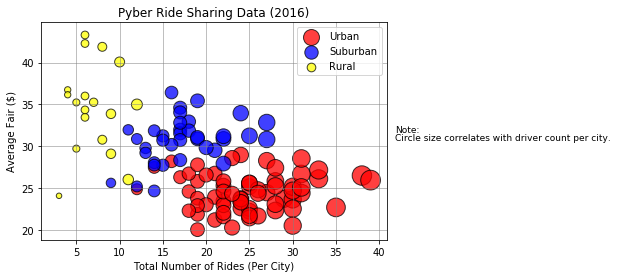

In [137]:
# Obtain the x and y coordinates for each of the three city type

# types = ride_city_data.type.value_counts()
# types

urban_area_df = ride_city_data[ride_city_data.type == 'Urban']

suburban_area_df = ride_city_data[ride_city_data.type == 'Suburban']

rural_area_df = ride_city_data[ride_city_data.type == 'Rural']

# Build the scatter plots for each city types

x_axis_urban = urban_area_df.groupby(['city']).count()['ride_id']
y_axis_urban = urban_area_df.groupby(['city']).mean()['fare']
driver_urban = urban_area_df.groupby(['city']).mean()['driver_count']

x_axis_suburban = suburban_area_df.groupby(['city']).count()['ride_id']
y_axis_suburban = suburban_area_df.groupby(['city']).mean()['fare']
driver_suburban = suburban_area_df.groupby(['city']).mean()['driver_count']


x_axis_rural = rural_area_df.groupby(['city']).count()['ride_id']
y_axis_rural = rural_area_df.groupby(['city']).mean()['fare']
driver_rural = rural_area_df.groupby(['city']).mean()['driver_count']

plt.scatter(x_axis_urban, y_axis_urban, marker="o", facecolors="red", edgecolors="black",
            s=x_axis_urban * 10, alpha=0.75, label='Urban')
plt.scatter(x_axis_suburban, y_axis_suburban, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis_suburban * 10, alpha=0.75, label = 'Suburban')
plt.scatter(x_axis_rural, y_axis_rural, marker="o", facecolors="yellow", edgecolors="black",
            s=x_axis_rural * 10, alpha=0.75, label='Rural')
# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fair ($)') 
# Create a legend
plt.legend(loc='best')
# Incorporate a text label regarding circle size
plt.gcf().text(0.92, 0.5, 'Note:', fontsize=9)
plt.gcf().text(0.92, 0.47, 'Circle size correlates with driver count per city.', fontsize=9)
plt.subplots_adjust(left=0.1)
plt.grid(color='grey', linestyle='-', linewidth=.5)
# Save Figure
# fig_pyber = plt.show
plt.savefig("\matplotlib\PyberScatter.png", transparent=True)
plt.show()



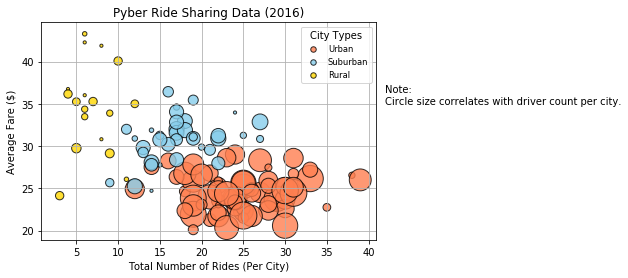

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

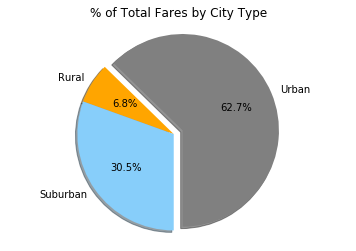

In [147]:
# Calculate Ride Percents
total_urban_fares = urban_area_df.sum()['fare']
total_suburban_fares = suburban_area_df.sum()['fare']
total_rural_fares = rural_area_df.sum()['fare']
total_fares = ride_city_data.sum()['fare']

percent_urban = ((total_urban_fares / total_fares) *100)
percent_suburban = percent_suburban = ((total_suburban_fares / total_fares) *100)
percent_rural = percent_rural = ((total_rural_fares / total_fares) *100)

# Build Pie Chart
labels = ['Urban', 'Rural', 'Suburban']
sizes = [62.7, 6.8, 30.5]
colors = ['gray', 'orange', 'lightskyblue']

explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis("equal")
plt.title('% of Total Fares by City Type') 
# Save Figure
plt.savefig("\matplotlib\PyberPie.png")

plt.show()







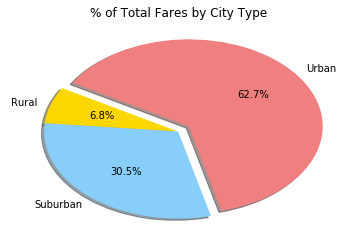

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

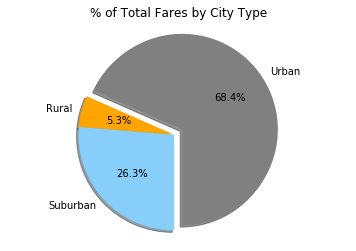

In [140]:
# Calculate Ride Percents
total_urban_rides = urban_area_df.count()['ride_id']
total_suburban_rides = suburban_area_df.count()['ride_id']
total_rural_rides = rural_area_df.count()['ride_id']
total_rides = ride_city_data.count()['ride_id']

percent_urban = ((total_urban_rides / total_rides).round(3) *100)
percent_suburban = percent_suburban = ((total_suburban_rides / total_rides).round(3) *100)
percent_rural = percent_rural = ((total_rural_rides / total_rides).round(3) *100)

# Build Pie Chart
labels = ['Urban', 'Rural', 'Suburban']
sizes = [68.4, 5.3, 26.3]
colors = ['gray', 'orange', 'lightskyblue']

explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis("equal")
plt.title('% of Total Rides by City Type') 
# Save Figure
plt.savefig("\matplotlib\PyberPie_Fares.png")

plt.show()


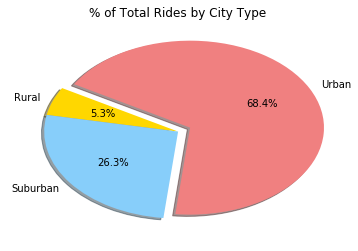

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

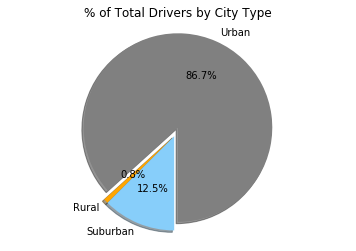

In [168]:

# Calculate Driver Percents
total_urban_drivers = urban_area_df['driver_count'].sum()
total_suburban_drivers = suburban_area_df['driver_count'].sum()
total_rural_drivers = rural_area_df['driver_count'].sum()
total_drivers = ride_city_data['driver_count'].sum()

percent_urban = ((total_urban_drivers / total_drivers).round(3) *100)
percent_suburban = percent_suburban = ((total_suburban_drivers / total_drivers).round(3) *100)
percent_rural = percent_rural = ((total_rural_drivers / total_drivers).round(3) *100)

# Build Pie Chart
labels = ['Urban', 'Rural', 'Suburban']
sizes = [86.7, 0.8, 12.5]
colors = ['gray', 'orange', 'lightskyblue']

explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis("equal")
plt.title('% of Total Drivers by City Type') 
# Save Figure
plt.savefig("\matplotlib\PyberPie_Drivers.png")

plt.show()




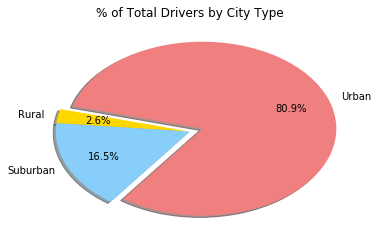

In [6]:
# Show Figure
plt.show()